In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt

In [3]:
tips=sns.load_dataset("tips")

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.shape

(244, 7)

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

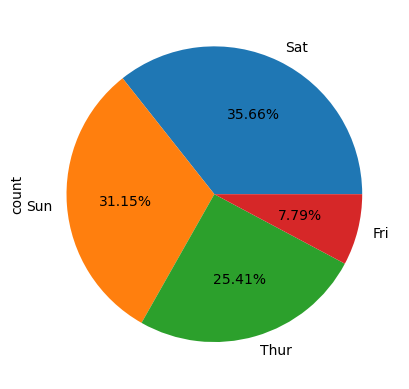

In [6]:

tips["day"].value_counts().plot(kind="pie",autopct='%1.2f%%')
tips["day"].value_counts()

In [7]:
tips["size"].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

In [8]:
stats = {
    #'Column Name': data.columns,
    'Null Values': tips.isnull().sum(),
    'Percentage Null Values': (tips.isnull().sum() / len(tips)) * 100,
    'Total Unique Values': tips.nunique(),
    'Percentage Unique Values': (tips.nunique() / len(tips)) * 100
}

# Create a DataFrame from the statistics dictionary
stats_df = pd.DataFrame(stats)

# Display the DataFrame
stats_df

,Null Values,Percentage Null Values,Total Unique Values,Percentage Unique Values
total_bill,0,0.0,229,93.852459
tip,0,0.0,123,50.409836
sex,0,0.0,2,0.819672
smoker,0,0.0,2,0.819672
day,0,0.0,4,1.639344
time,0,0.0,2,0.819672
size,0,0.0,6,2.459016


In [9]:
for column in tips.columns:
    # Get unique values and their counts
    unique_values = tips[column].unique()
    num_unique_values = len(unique_values)
    
    # Print the unique values and total unique count for each column
    print(f"Column: {column}")
    print(f"Total unique values: {num_unique_values}")
#    print(f"Unique values: {unique_values}")
#   print()

Column: total_bill
Total unique values: 229
Column: tip
Total unique values: 123
Column: sex
Total unique values: 2
Column: smoker
Total unique values: 2
Column: day
Total unique values: 4
Column: time
Total unique values: 2
Column: size
Total unique values: 6


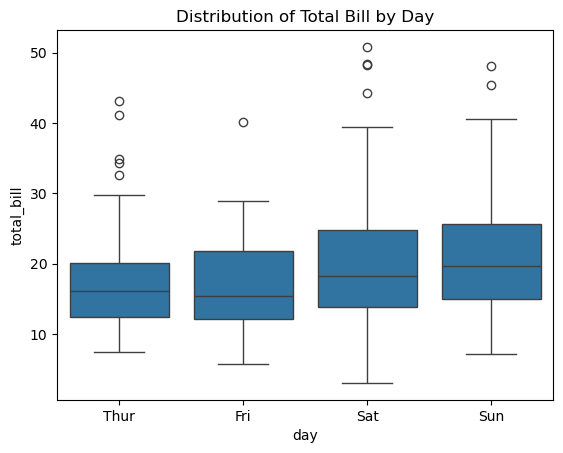

In [10]:
#How would you create a boxplot to compare the distribution of total bills on different days of the week?
sns.boxplot(data=tips, x="day", y="total_bill")
plt.title("Distribution of Total Bill by Day")
plt.show()

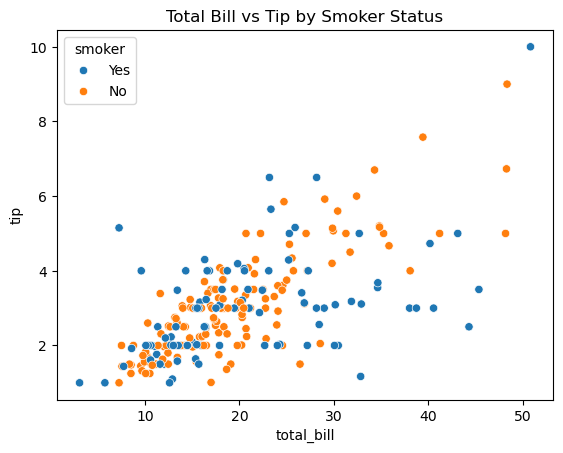

In [11]:
#How can you use Seaborn to visualize the relationship between total bill and tip, categorized by smoker status?
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="smoker")
plt.title("Total Bill vs Tip by Smoker Status")
plt.show()

<Axes: xlabel='time', ylabel='tip'>

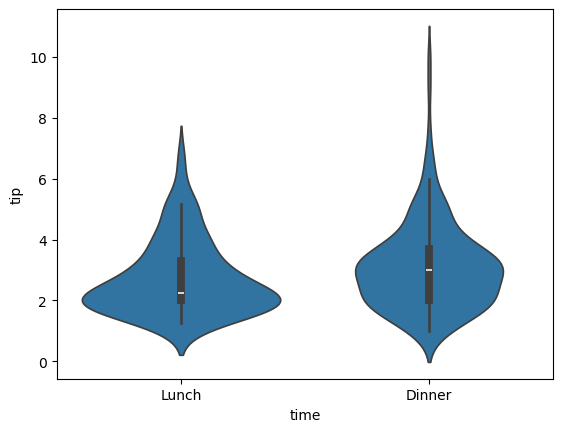

In [12]:
#How would you visualize the distribution of tips for different times of the day (Lunch vs. Dinner)?
sns.violinplot(data=tips,x="time",y="tip")

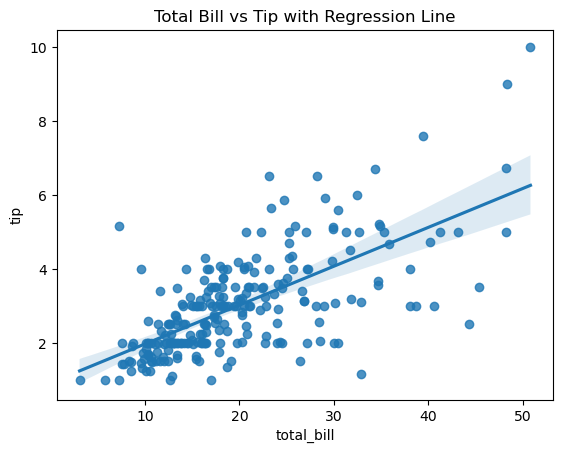

In [13]:
sns.regplot(data=tips, x="total_bill", y="tip")
plt.title("Total Bill vs Tip with Regression Line")
plt.show()

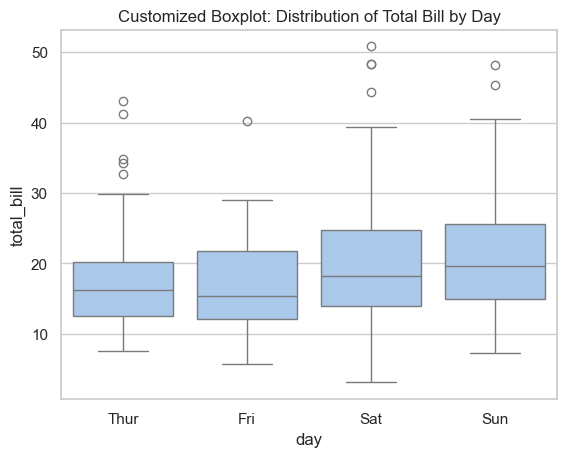

In [14]:
sns.set_theme(style="whitegrid", palette="pastel")

sns.boxplot(data=tips, x="day", y="total_bill")
plt.title("Customized Boxplot: Distribution of Total Bill by Day")
plt.show()

In [15]:
#How can you calculate the average total bill and tip in the dataset?
avg_total_bill = tips['total_bill'].mean()
avg_tip = tips['tip'].mean()
print(f"Average Total Bill: {avg_total_bill}")
print(f"Average Tip: {avg_tip}")

Average Total Bill: 19.78594262295082
Average Tip: 2.99827868852459


In [16]:
#How can you determine which day had the highest total bill?
highest_bill=tips.groupby("day")["total_bill"].sum()
highest_bill_day=highest_bill.idxmax()
highest_bill_day

'Sat'

In [17]:
#How do you add a new column to the dataset that represents the percentage tip given (tip as a percentage of the total bill)?
tips['tip_percentage'] = (tips['tip'] / tips['total_bill']) * 100
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [18]:
#How would you filter the dataset to include only dinner-time transactions with parties of 4 or more?
dinner_large_parties = tips[(tips['time'] == 'Dinner') & (tips['size'] >= 4)]
dinner_large_parties.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
5,25.29,4.71,Male,No,Sun,Dinner,4,18.623962
7,26.88,3.12,Male,No,Sun,Dinner,4,11.607143
11,35.26,5.00,Female,No,Sun,Dinner,4,14.180374
13,18.43,3.00,Male,No,Sun,Dinner,4,16.277808


In [19]:
#How can you group the dataset by day and calculate the average tip for each day?
avg_tip_per_day = tips.groupby('day')['tip'].mean()
print(avg_tip_per_day)

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64


In [20]:
# How would you find the correlation between total bill and tip?
corr_bill_tip=tips["total_bill"].corr(tips["tip"])
corr_bill_tip

0.6757341092113641

In [21]:
#How can you sort the dataset by total bill in descending order?
sorted_tips = tips.sort_values(by='total_bill', ascending=False)
sorted_tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
170,50.81,10.00,Male,Yes,Sat,Dinner,3,19.681165
212,48.33,9.00,Male,No,Sat,Dinner,4,18.621974
59,48.27,6.73,Male,No,Sat,Dinner,4,13.942407
156,48.17,5.00,Male,No,Sun,Dinner,6,10.379905
182,45.35,3.50,Male,Yes,Sun,Dinner,3,7.717751


In [22]:
# How would you find the most common tip amount in the dataset?
most_common_tip = tips['tip'].mode()[0]
print(f"Most common tip amount: {most_common_tip}")

Most common tip amount: 2.0


**Question: Analyze the impact of party size on the tip percentage, and determine if larger parties tend to tip more generously. Additionally, account for potential confounding factors such as time of day (Lunch vs. Dinner) and smoker status.**

In [ ]:

# Calculate tip percentage
tips['tip_percentage'] = (tips['tip'] / tips['total_bill']) * 100

# Group by party size, time, and smoker status
grouped = tips.groupby(['size', 'time', 'smoker'])['tip_percentage'].mean().reset_index()

# Pivot the data to make it easier to compare
pivot_table = grouped.pivot_table(values='tip_percentage', 
                                  index=['size'], 
                                  columns=['time', 'smoker'])

print(pivot_table)

# Visualization: Plot the impact of party size on tip percentage
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.lineplot(data=grouped, x='size', y='tip_percentage', hue='time', style='smoker', markers=True)
plt.title('Impact of Party Size on Tip Percentage by Time and Smoker Status')
plt.xlabel('Party Size')
plt.ylabel('Average Tip Percentage')
plt.show()

time        Lunch                Dinner           
smoker        Yes         No        Yes         No
size                                              
1       22.377622  18.172790  32.573290  13.793103
2       16.526646  16.600549  16.724556  16.438257
3       20.495178  11.874209  14.806081  15.370533
4       15.540960  13.891885  13.906415  14.873740
5             NaN  12.138869   8.611591  20.692847
6             NaN  17.370592        NaN  10.379905


In [ ]:
pivot_table

**Question: Identify any anomalies in tipping behavior by analyzing the relationship between the total bill, tip percentage, and other factors such as day of the week and gender. Specifically, detect outliers in tip percentages and investigate whether these outliers are concentrated in specific groups.**

In [ ]:

# Calculate tip percentage
tips['tip_percentage'] = (tips['tip'] / tips['total_bill']) * 100

# Identify outliers using the IQR method
Q1 = tips['tip_percentage'].quantile(0.25)
Q3 = tips['tip_percentage'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points outside 1.5 * IQR from Q1 and Q3
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
outliers = tips[(tips['tip_percentage'] < lower_bound) | (tips['tip_percentage'] > upper_bound)]

print(f"Number of outliers detected: {len(outliers)}")
print(outliers[['total_bill', 'tip', 'tip_percentage', 'day', 'sex']])

# Grouping outliers by day and gender
outlier_analysis = outliers.groupby(['day', 'sex'])['tip_percentage'].count().reset_index()

print("\nOutlier Count by Day and Gender:")
print(outlier_analysis)

# Visualization: Plotting outliers
plt.figure(figsize=(12, 8))
sns.scatterplot(data=outliers, x='total_bill', y='tip_percentage', hue='day', style='sex', s=100)
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Upper Bound')
plt.axhline(y=lower_bound, color='k', linestyle='--', label='Lower Bound')
plt.title('Outliers in Tip Percentage by Total Bill, Day, and Gender')
plt.xlabel('Total Bill')
plt.ylabel('Tip Percentage')
plt.legend()
plt.show()


In [ ]:
outlier_analysis

In [ ]:
outliers[['total_bill', 'tip', 'tip_percentage', 'day', 'sex']] #Number of outlier detect=4

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
#plt.figure(figsize=(10,6))
plt.style.use("ggplot")
sns.histplot(tips["total_bill"],bins=50,kde=True,color='darkblue')
plt.subplot(1,2,2)
plt.title('Histogram of total bill')
#plt.figure(figsize=(12,6))
plt.subplot(1, 2, 2)
sns.histplot(tips['tip'], bins=50, kde=True)
plt.title('Histogram of tips')
plt.xlabel('Tips')
plt.ylabel('Frequency')

In [ ]:
pd.DataFrame(tips.nunique(),columns=["Number Of Unique Values"])

In [ ]:
categorical_features = ["day", "sex", "smoker"]
print(categorical_features)

In [ ]:
for column in categorical_features:
    counts = tips[column].value_counts()
    sns.color_palette("bright")
    plt.figure(figsize=(10, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie chart for {column}', fontdict={"color" : "darkblue", "weight" : "bold", "size" : 15})
    plt.axis('equal')
    plt.legend()
    plt.show()

In [ ]:
# Seperating Numeric and Categoreical Variables
numeric_features = ["total_bill", "tip", "size"]
categorical_features = ["day", "sex", "smoker"]

In [ ]:
def scatter(col):
    plt.figure(figsize=(8, 6))
    sns.set_style("darkgrid")
    sns.regplot(data=tips, x=col, y='tip', color='blue', line_kws={"color": 'black'})
    plt.title(f"{col} Vs tip", fontdict={"color" : "darkred", "weight" : "bold", "size" : 15})
    plt.xlabel(col, fontdict={"color": "darkblue", "weight": "bold", "size": 10})
    plt.ylabel('Price', fontdict={"color": "darkblue", "weight": "bold", "size": 10})
    plt.show()

In [ ]:
scatter("total_bill")

In [ ]:
scatter("size")

In [ ]:
def bivariate_barplot(col):
    """This method would compare price by each categorical feature"""
    # Bar Plots with Aggregated Metrics
    mean = tips.groupby(col)['total_bill'].mean()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=mean.index, y=mean.values, palette='rainbow')
    plt.title(f'total bill by {col}', fontdict={"color" : "darkred", "weight" : "bold", "size" : 15})
    plt.xlabel(col, fontdict={"color" : "darkblue", "weight" : "bold", "size" : 10})
    plt.ylabel('total bill', fontdict={"color" : "darkblue", "weight" : "bold", "size" : 10})
    plt.show()

In [ ]:
bivariate_barplot("sex")

In [ ]:
bivariate_barplot("day")

In [ ]:
bivariate_barplot("smoker")

In [ ]:
def pointplot(col):
    plt.figure(figsize=(10, 6))
    sns.pointplot(data=tips, x=col, y='tip', color='purple', ci=None)
    plt.title(f'Point plot of {col} vs tip', fontdict={"color" : "darkred", "weight" : "bold", "size" : 15})
    plt.xlabel(col, fontdict={"color" : "darkblue", "weight" : "bold", "size" : 10})
    plt.ylabel('tip', fontdict={"color" : "darkblue", "weight" : "bold", "size" : 10})
#    plt.legend()
    plt.show()

In [ ]:
pointplot("day")

In [ ]:
pointplot("sex")

In [ ]:
pointplot("smoker")

In [ ]:
#calculate the average tip percentage for each day of the week and visualze the result
tips_percent=tips.groupby("day")["tip_percentage"].mean().reset_index()
#visualization
sns.barplot(x="day",y="tip_percentage",data=tips_percent)

In [ ]:
#Find the correalation between the total bill,tip and size
core=tips[["total_bill","tip","size"]].corr()
core

In [ ]:
#identify the day with the highest average total bill and determine the corresponding tip percentage
highest_avg_bill=tips.groupby("day").agg({"total_bill":"mean","tip_percentage":"mean"}).reset_index()
highest_avg_bill.iloc[0]

In [ ]:
#Determine if theresa significent difference in tipping behaviour between smokers and non smokers using statistical testing
#smoker_tips=tips[tips["smoker"]=="Yes"]["tip_percentage"]
#nonsmoker_tips=tips[tips["smoker"]=="No"]["tip_percentage"]
#t_stat,p_value=stats.ttest_ind(smoker_tips,nonsmoker_tips)
#t_stat,p_value

In [ ]:
#Identify the top 3 most genrous customers by calculating the highest tip percentage
top_gen_customers=tips.sort_values("tip_percentage",ascending=False).head(3)
top_gen_customers[["total_bill","tip","tip_percentage"]]

In [ ]:
#compare the average total bill for each gender using a bar chart
avg_bill_gen=tips.groupby("sex")["total_bill"].mean().reset_index()
sns.barplot(x="sex",y="total_bill",data=avg_bill_gen)


In [ ]:
#Investigate if the size of the dining party affects the tip percentage using a scatter plot
sns.scatterplot(x="size",y="tip_percentage",data=tips)

In [ ]:
#Analyze the average tip amount for different combinations of gender and smoker status
avg_tip_by_gender=tips.groupby(["sex","smoker"])["tip"].mean().reset_index()
sns.barplot(x="sex",y="tip",hue="smoker",data=avg_tip_by_gender)

In [ ]:
#Create a boxplot to compare the percentage across different days of the week
sns.boxplot(x="day",y="tip_percentage",data=tips)

In [ ]:
#17
day_variability=tips.groupby("day")["total_bill"].std().reset_index().sort_values("total_bill",ascending=False)
day_variability.iloc[0]